<a href="https://colab.research.google.com/github/solishiguera/reporte-performance/blob/main/ReportePerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")  
!pwd

Mounted at /content/gdrive
/content


In [3]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/SEMESTRE_7/Modulo2/Evidencia2"
!ls

/content/gdrive/MyDrive/Colab Notebooks/SEMESTRE_7/Modulo2/Evidencia2
cereal.csv  Evidencia2.ipynb  ReportePerformance.ipynb	wine.data


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from pandas.plotting import scatter_matrix
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import *

*   1) Alcohol
*   2) Malic acid
*   3) Ash
*   4) Alcalinity of ash  
*   5) Magnesium
*   6) Total phenols
*   7) Flavanoids
*   8) Nonflavanoid phenols
*   9) Proanthocyanins
*   10) Color intensity
*   11) Hue
*   12) OD280/OD315 of diluted wines
*   13) Proline   

In [5]:
columns = ['Alcohol', 
           'Malic acid', 
           'Ash', 
           'Alcalinity of ash', 
           'Magnesium', 
           'Total phenols', 
           'Flavanoids', 
           'Nonflavanoid phenols', 
           'Proanthocyanins', 
           'Color intensity', 
           'Hue', 
           'OD280/OD315 of diluted wines', 
           'Proline']
df = pd.read_csv('wine.data', names=columns)
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.shape

(178, 13)

In [7]:
df.isna().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [8]:
df.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


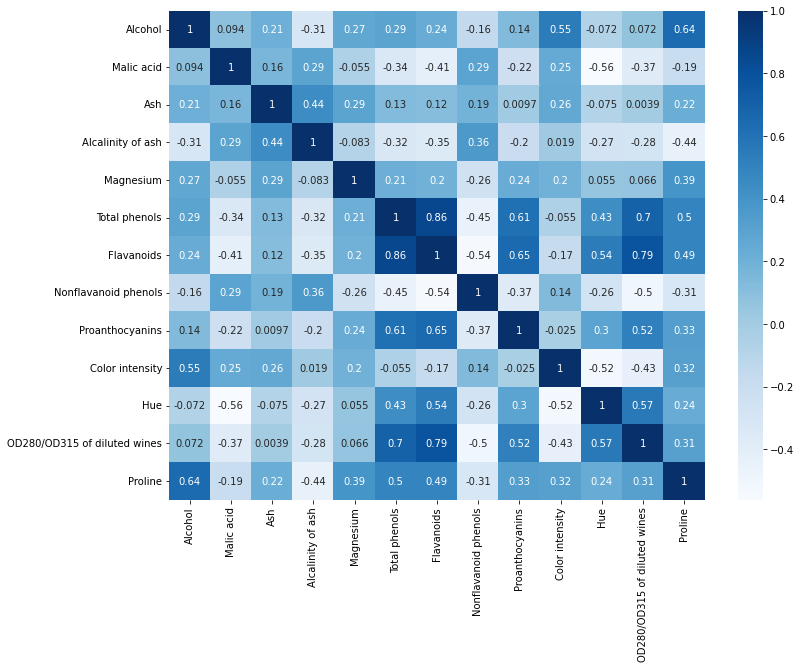

In [9]:
corr_df = df.corr(method='pearson')
plt.figure(figsize=(12, 9))
sns.heatmap(corr_df, annot=True, cmap="Blues")
plt.show()

In [18]:
x_list = [ 'Malic acid', 
    'Total phenols', 
    'Nonflavanoid phenols', 
    'Proanthocyanins', 
    'Hue', 
    'OD280/OD315 of diluted wines', 
    'Proline']
y_list = ['Flavanoids']

n_plots = len(y_list)*len(x_list)
fig = make_subplots(rows=n_plots, cols=1)

row_count=1
names = []
for y in y_list:
    for x in x_list:
        fig.add_trace(go.Scatter(x=df[x].values, y=df[y].values, mode = 'markers',),row=row_count,col=1)
        names.append(y+'=f('+x+')')

        # axis titles
        fig.update_xaxes(title = x, row = row_count)
        fig.update_yaxes(title = y, row = row_count)
        row_count+=1

fig.update_layout(height=n_plots*250, width=600)
fig.show()

In [38]:

"""x = df[['Malic acid', 
    'Total phenols', 
    'Nonflavanoid phenols', 
    'Proanthocyanins', 
    'Hue', 
    'OD280/OD315 of diluted wines', 
    'Proline']] """
x = df[[
'Total phenols']]
# Nuestra varible dependiente
y = df[['Flavanoids']]

# Separamos un conjunto de datos para entrenar y otro para probar
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=4)

In [39]:
# Iniciamos el modelo
ml_mod = LinearRegression()

In [27]:
# Iniciamos el modelo
forest_reg = RandomForestRegressor()

In [40]:
# Training model
ml_mod.fit(X_train,y_train)

# Training predictions
y_train_pred_ml = ml_mod.predict(X_train)

# Model evaluation
r1_ml = metrics.r2_score(y_train, y_train_pred_ml)
print("Score de datos de entrenamiento: " +"{:.6}".format(r1_ml*100)+"%")

# Testing predictions
y_test_pred_ml = ml_mod.predict(X_test)

# Model evaluation
r2_ml = metrics.r2_score(y_test, y_test_pred_ml)
print("Score de datos de prueba: " +"{:.6}".format(r2_ml*100)+"%")

mse_ml = mean_squared_error(y_test,y_test_pred_ml)
print("Error cuadrático medio: " +"{:.6}".format(np.sqrt(mse_ml)))

Score de datos de entrenamiento: 74.0688%
Score de datos de prueba: 75.3512%
Error cuadrático medio: 0.500458


In [30]:
# Entrenamiento del modelo
forest_reg.fit(X_train,y_train.values.ravel())

# Predicciones del conjuto de entrenamiento
y_train_pred_fr = forest_reg.predict(X_train)

# Evaluamos el modelo
r1_fr = metrics.r2_score(y_train, y_train_pred_fr)
print("Score de datos de entrenamiento: " +"{:.6}".format(r1_fr*100)+"%")

# Predicciones del conjuto de prueba
y_test_pred_fr = forest_reg.predict(X_test)

# Evaluamos el modelo
r2_fr = metrics.r2_score(y_test, y_test_pred_fr)
print("Score de datos de prueba: " +"{:.6}".format(r2_fr*100)+"%")
mse_fr = mean_squared_error(y_test,y_test_pred_fr)
print("Error cuadrático medio: " +"{:.6}".format(np.sqrt(mse_fr)))

Score de datos de entrenamiento: 97.7807%
Score de datos de prueba: 87.5146%
Error cuadrático medio: 0.35618


In [32]:
# Predicción completa de los datos
predict_rating_forest = forest_reg.predict(x).tolist()

# Tabla con valores reales y de prediccion
comparison = pd.DataFrame({'Real': df["Flavanoids"], 'Predicción': predict_rating_forest})
muestra = comparison.head(25) # Elegimos 25 valores de muestra
muestra.head(15)

,Real,Predicción
1,3.06,3.0711
1,2.76,2.7186
1,3.24,3.0275
1,3.49,3.4704
1,2.69,2.7557
1,3.39,3.4304
1,2.52,2.5192
1,2.51,2.5875
1,2.98,2.9803
1,3.15,3.0990


In [24]:
# Predicción completa de los datos
predict_rating = ml_mod.predict(x).tolist()

# Tabla con valores reales y de prediccion
comparison = pd.DataFrame({'Real': df["Flavanoids"], 'Predicción': predict_rating})
muestra = comparison.head(25) # Elegimos 25 valores de muestra
muestra.head(15)


,Real,Predicción
1,3.06,[3.253128852247715]
1,2.76,[2.7069178782042425]
1,3.24,[3.106122917949117]
1,3.49,[3.8937868610398865]
1,2.69,[2.5929401455016587]
1,3.39,[3.1688550344370534]
1,2.52,[2.8394325815526233]
1,2.51,[2.71228636429622]
1,2.98,[2.8032940521357648]
1,3.15,[3.197590583476256]


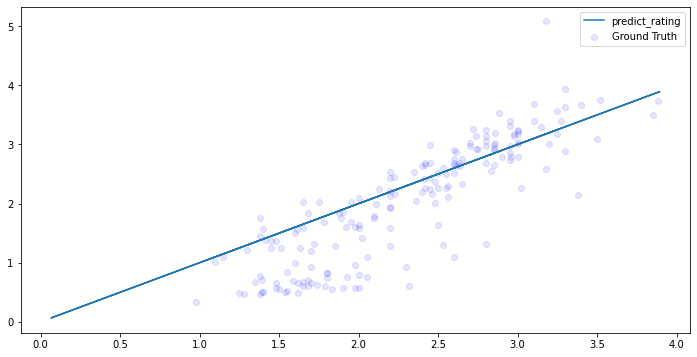

In [23]:
plt.figure(figsize=(12,6))
plt.plot(predict_rating, predict_rating,label=f'predict_rating')
plt.scatter(df['Total phenols'], df['Flavanoids'],label='Ground Truth',color='b',alpha=0.1)
plt.legend()
plt.show()

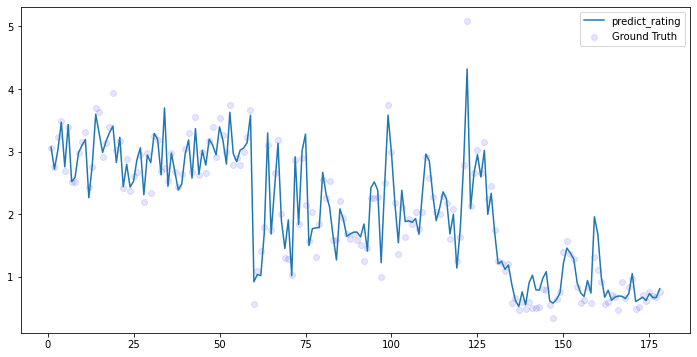

In [37]:
plt.figure(figsize=(12,6))
plt.plot(np.linspace(1,178, 178), predict_rating_forest,label=f'predict_rating')
plt.scatter(np.linspace(1,178, 178), df['Flavanoids'],label='Ground Truth',color='b',alpha=0.1)
plt.legend()
plt.show()

178